# Final Project

__`Deskripsi`__ :
- Pernahkah kamu bertanya kapan waktu terbaik untuk memesan kamar hotel? 
- Atau berapa lama waktu tinggal untuk mendapatkan harga dengan rate terbaik? 
- Bagaimana jika kamu ingin memprediksi kapan hotel mendapat pesanan unik?

__`Konten`__ :

- Data mengandung informasi pemesanan hotel dan resort. 
- Informasi yang terkandung meliputi kapan waktu pemesanan, durasi stay, jumlah orang dewasa, anak, dan/atau bayi, jumlah tempat parker yang tersedia, dan lain-lain.
- Semua informasi personal terkait pemesan telah dihapus dari data.


## Tugas:


1. Jelaskan apa gambaran besar yang anda dapatkan dari data tersebut.
2. Tunjukkan properties dari data pada setiap kolom, seperti type, missing value, dan lain-lain.
3. Tunjukkan jumlah data, mean, median, dan standar deviasi.
4. Berapa nilai minimal dan maksimal untuk kolom yang mengandung data numerik?
5.	Selesaikan masalah missing value dengan cara berikut:
    - Drop kolom-kolom yang mengandung missing value lebih dari 50% keseluruhan data.
    - Isi missing value pada kolom country dan children dengan data yang paling banyak muncul.
    - Isi missing value pada kolom agent dengan mean.
6.	Buat kategori berdasarkan lead time: Short, Medium, dan Long
7.	Filter semua data yang memiliki reservation_status_date di > 2017
8.	Visualisasikan arrival_date_month  untuk melihat bulan dimana pengunjung terbanyak

In [2]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


1. Jelaskan apa gambaran besar yang anda dapatkan dari data tersebut.

### Jawaban No. 1:

Data di atas merupakan summary dari data penginapan/hotel yg terdiri dari:
- Jenis hotel
- Negara
- Tgl, bln, tahun kedatangan
- Total menginap (hari) di weekend 
- Tamu yang datang (Dewasa, anak, infants)


2. Tunjukkan properties dari data pada setiap kolom, seperti type, missing value, dan lain-lain.

### Jawaban No. 2:

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

3. Tunjukkan jumlah data, mean, median, dan standar deviasi.

### Jawaban No. 3 :

In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


4. Berapa nilai minimal dan maksimal untuk kolom yang mengandung data numerik?

## Jawaban No. 4

In [68]:

df4=df
df4

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Reserved_CAT,leadtime_CAT
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,<2017,Long_Trip
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,<2017,Long_Trip
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,<2017,Short_trip
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,<2017,Short_trip
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,<2017,Short_trip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,>2017,Short_trip
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,>2017,Medium_Trip
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,>2017,Short_trip
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,>2017,Medium_Trip


In [67]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


#### Minimum Value

#### Maximum value

In [177]:
numerics = [int64,float64]


TypeError: '<=' not supported between instances of 'int' and 'numpy.str_'

5. Selesaikan masalah missing value dengan cara berikut:
    - Drop kolom-kolom yang mengandung missing value lebih dari 50% keseluruhan data.
    - Isi missing value pada kolom country dan children dengan data yang paling banyak muncul.
    - isi missing value pada kolom agent dengan mean.

### Jawaban No. 5

In [153]:
df5=df
df5

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Reserved_CAT,leadtime_CAT
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,<2017,Long_Trip
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,<2017,Long_Trip
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,<2017,Short_trip
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,<2017,Short_trip
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,<2017,Short_trip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,>2017,Short_trip
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,>2017,Medium_Trip
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,>2017,Short_trip
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,>2017,Medium_Trip


In [154]:
df9 = df5.replace({"?":np.nan, "--":np.nan})
df9

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Reserved_CAT,leadtime_CAT
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,<2017,Long_Trip
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,<2017,Long_Trip
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,<2017,Short_trip
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,<2017,Short_trip
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,<2017,Short_trip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,>2017,Short_trip
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,>2017,Medium_Trip
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,>2017,Short_trip
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,>2017,Medium_Trip


In [155]:
df9.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [156]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Isi missing value pada kolom  children[10] dan country[13] dengan data yang paling banyak muncul.

In [158]:
df9.iloc[:, [10,13]]

,children,country
0,0.0,PRT
1,0.0,PRT
2,0.0,GBR
3,0.0,GBR
4,0.0,GBR
...,...,...
119385,0.0,BEL
119386,0.0,FRA
119387,0.0,DEU
119388,0.0,GBR


Mengganti kolom agent [23] dengan mean

In [148]:
df9.iloc[:,23]=df9.iloc[:,23].fillna(df9.iloc[:,23].mean())

In [149]:
df9

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Reserved_CAT,leadtime_CAT
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,<2017,Long_Trip
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,<2017,Long_Trip
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,<2017,Short_trip
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,<2017,Short_trip
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,<2017,Short_trip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,>2017,Short_trip
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,>2017,Medium_Trip
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,>2017,Short_trip
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,>2017,Medium_Trip


In [150]:
df9.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

6. Buat kategori berdasarkan lead time: Short, Medium, dan Long
### Jawaban no. 6:

In [28]:
df2=df

In [30]:
df2["leadtime_CAT"]=np.where(df2["lead_time"]>300, "Long_Trip",np.where(df2["lead_time"]>100, "Medium_Trip", "Short_trip"))
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Reserved_CAT,leadtime_CAT
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,<2017,Long_Trip
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,<2017,Long_Trip
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,<2017,Short_trip
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,<2017,Short_trip
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,<2017,Short_trip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,>2017,Short_trip
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,>2017,Medium_Trip
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,>2017,Short_trip
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,>2017,Medium_Trip


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [39]:
df2.iloc[:,[2,33]]

,lead_time,leadtime_CAT
0,342,Long_Trip
1,737,Long_Trip
2,7,Short_trip
3,13,Short_trip
4,14,Short_trip
...,...,...
119385,23,Short_trip
119386,102,Medium_Trip
119387,34,Short_trip
119388,109,Medium_Trip


7. Filter semua data yang memiliki reservation_status_date di > 2017
### Jawaban No.7 :

In [11]:
df1 = df

In [19]:
df1["Reserved_CAT"] = np.where(df1["reservation_status_date"]>"2017-01-01", ">2017", "<2017")
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Reserved_CAT
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,<2017
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,<2017
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,<2017
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,<2017
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,<2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,>2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,>2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,>2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,>2017


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [21]:
df1.iloc[:, [32]]

,Reserved_CAT
0,<2017
1,<2017
2,<2017
3,<2017
4,<2017
...,...
119385,>2017
119386,>2017
119387,>2017
119388,>2017


In [27]:
filter1 = df1.loc[df1["Reserved_CAT"]==">2017"]
filter1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Reserved_CAT
9788,Resort Hotel,1,89,2017,January,1,2,1,3,2,...,240.0,NaN,0,Transient,46.80,0,1,No-Show,2017-01-02,>2017
9805,Resort Hotel,1,6,2017,January,1,4,0,1,1,...,NaN,NaN,0,Transient,39.00,0,0,Canceled,2017-01-03,>2017
9809,Resort Hotel,1,112,2017,January,1,4,2,4,2,...,240.0,NaN,0,Transient,52.00,0,2,No-Show,2017-01-04,>2017
9818,Resort Hotel,1,2,2017,January,1,6,2,3,1,...,240.0,NaN,0,Transient,43.00,0,1,No-Show,2017-01-06,>2017
9838,Resort Hotel,1,0,2017,January,2,10,0,1,2,...,NaN,NaN,0,Transient,0.00,0,0,Canceled,2017-01-10,>2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,>2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,>2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,>2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,>2017


8. Visualisasikan arrival_date_month untuk melihat bulan dimana pengunjung terbanyak

### Jawaban No. 8


In [60]:
df8=df
df8

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Reserved_CAT,leadtime_CAT
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,<2017,Long_Trip
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,<2017,Long_Trip
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,<2017,Short_trip
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,<2017,Short_trip
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,<2017,Short_trip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,>2017,Short_trip
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,>2017,Medium_Trip
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,>2017,Short_trip
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,>2017,Medium_Trip


In [169]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [161]:
df8.iloc[:, [4,9,10,11]]

,arrival_date_month,adults,children,babies
0,July,2,0.0,0
1,July,2,0.0,0
2,July,1,0.0,0
3,July,1,0.0,0
4,July,2,0.0,0
...,...,...,...,...
119385,August,2,0.0,0
119386,August,3,0.0,0
119387,August,2,0.0,0
119388,August,2,0.0,0


In [ ]:
arrival_date_month = df8["arrival_date_month"]
adults = df8["adults"]

plt.bar(arrival_date_month , adults )

plt.title("visitor in month")
plt.xlabel("Month")
plt.ylabel("visitor")

plt.show()

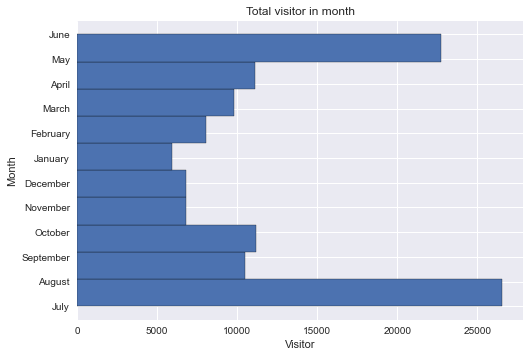

In [173]:
arrival_date_month = df8["arrival_date_month"]
adults = df8["adults"]

plt.hist(arrival_date_month, bins =10, edgecolor="k", orientation = "horizontal")
plt.title("Total visitor in month")
plt.ylabel("Month")
plt.xlabel("Visitor")

plt.show()

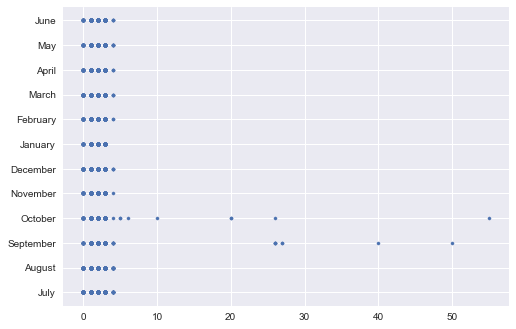

In [174]:
plt.style.use("seaborn")

plt.scatter(df8["adults"], df8["arrival_date_month"], s=10)

plt.show()